In [1]:
import spacy
from spacy.matcher import Matcher

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.probability import FreqDist


In [2]:
#Importer texte:
fichier = open(r"C:\Users\hadrien\Documents\Personnel\formation data\Projet\livre eng\The-Lord-of-the-Rings-Illustrated-Ed...-Z-Library.txt", 'r', encoding='utf-8')

contenu = fichier.read()


In [3]:
#Liste des noms propres:
nlp = spacy.load('en_core_web_md')
nlp.max_length = 3100000

matcher = Matcher(nlp.vocab)

p1 = [{'POS': 'PROPN'}]

matcher.add("personne", [p1])

doc = nlp(contenu)

matches = matcher(doc)

liste = []
for id_match, debut, fin in matches:
    matched_span = doc[debut:fin]
    liste.append(matched_span.text)
print(liste)

['LORD', 'RINGS', 'BY', 'J.R.R.', 'TOLKIEN', 'BY', 'Alan', 'Lee', 'Three', 'Rings', 'Dwarf', 'Mortal', 'Men', 'Dark', 'Lord', 'Land', 'Mordor', 'Shadows', 'Ring', 'Ring', 'Ring', 'Land', 'Mordor', 'Shadows', 'Title', 'Page', 'ANNIVERSARY', 'EDITION', 'SECOND', 'EDITION', 'PROLOGUE', 'BOOK', 'SHORT', 'CUT', 'MUSHROOMS', 'CONSPIRACY', 'OLD', 'FOREST', 'HOUSE', 'TOM', 'BOMBADIL', 'FOG', 'DOWNS', 'SIGN', 'PRANCING', 'PONY', 'STRIDER', 'DARK', 'FORD', 'BOOK', 'ELROND', 'Chapter', 'DARK', 'BRIDGE', 'KHAZAD', 'DÛM', 'LOTHLÓRIEN', 'GALADRIEL', 'LÓRIEN', 'GREAT', 'RIVER', 'FELLOWSHIP', 'BOROMIR', 'URUK', 'HAI', 'TREEBEARD', 'THE', 'WHITE', 'RIDER', 'GOLDEN', 'HALL', 'HELM', 'DEEP', 'ISENGARD', 'FLOTSAM', 'JETSAM', 'VOICE', 'SARUMAN', 'PALANTÍR', 'FOUR', 'TAMING', 'SMÉAGOL', 'Chapter', 'GATE', 'STEWED', 'ON', 'WEST', 'Chapter', 'POOL', 'CROSS', 'ROADS', 'UNGOL', 'SHELOB', '’S', 'LAIR', 'MASTER', 'SAMWISE', 'MINAS', 'COMPANY', 'MUSTER', 'ROHAN', 'RIDE', 'ROHIRRIM', 'PELENNOR', 'FIELDS', 'PYRE', '

(-0.5, 399.5, 199.5, -0.5)

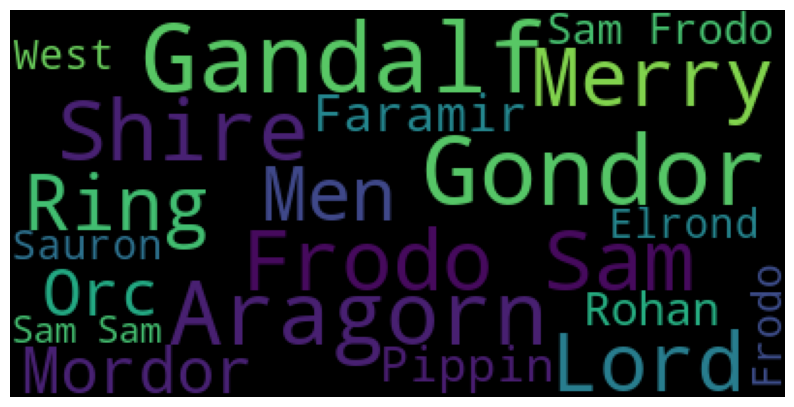

In [4]:
wc = WordCloud(background_color="black", max_words=20, max_font_size=50, random_state=42)

plt.figure(figsize=(10, 6))
wc.generate(' '.join(liste))  
plt.imshow(wc)
plt.axis("off")

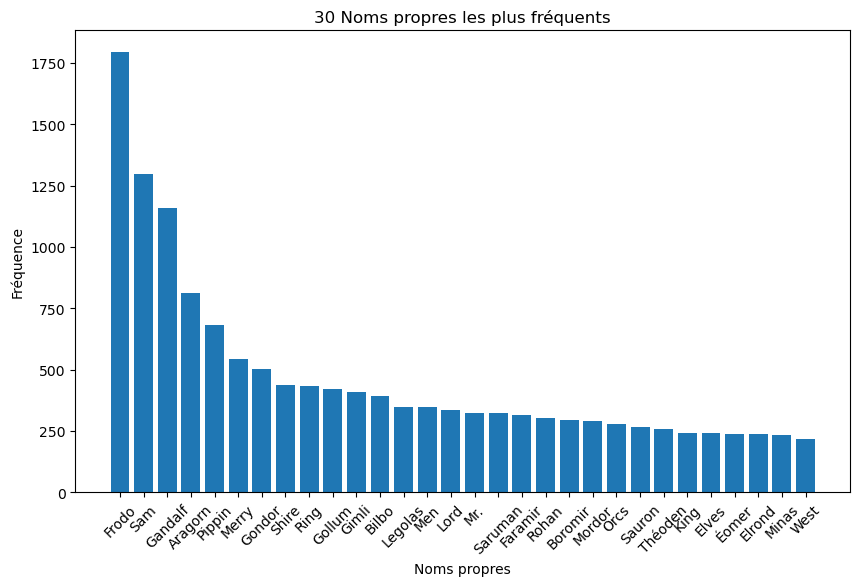

In [5]:

#Graphes des 30 noms prores les plus fréquents dans LOTR:
freq_dist = FreqDist(liste)

mots_frequents = freq_dist.most_common(30)

mots = [mot[0] for mot in mots_frequents]
frequences = [mot[1] for mot in mots_frequents]

plt.figure(figsize=(10, 6))
plt.bar(mots, frequences)
plt.xlabel('Noms propres')
plt.ylabel('Fréquence')
plt.title('30 Noms propres les plus fréquents')
plt.xticks(rotation=45)
plt.show()